In [126]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('positive_controls.csv', index_col=0)

/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/work/05204/rpg/jupyter_packages/envs/dask/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
if 'level_0' is in df.columns:
    df.drop(columns='level_0', inplace=True)

<AxesSubplot:xlabel='FSC_A', ylabel='SSC_A'>

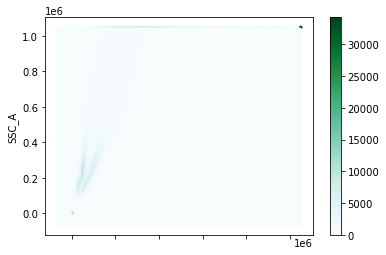

In [45]:
df.plot.hexbin(x='FSC_A', y='SSC_A');

# Forward Scatter Area as a function of incubation time (`inc_time_2`)

<AxesSubplot:xlabel='inc_time_2_hrs', ylabel='FSC_A'>

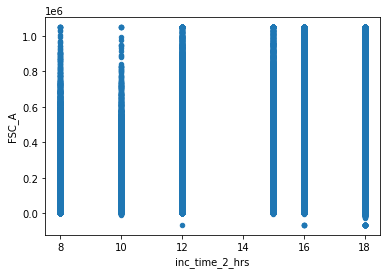

In [49]:
df.reset_index(level='inc_time_2_hrs', drop=False).plot.scatter(x='inc_time_2_hrs', y='FSC_A');

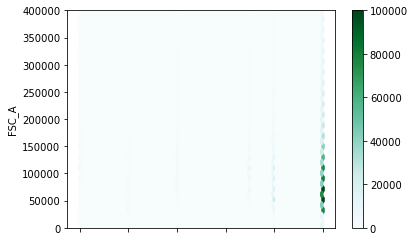

In [87]:
ax = df.reset_index(level='inc_time_2_hrs', drop=False).plot.hexbin(x='inc_time_2_hrs', y='FSC_A', vmax=100_000);
ax.set_ylim(0, 400_000);

## Plotting incubation times separately

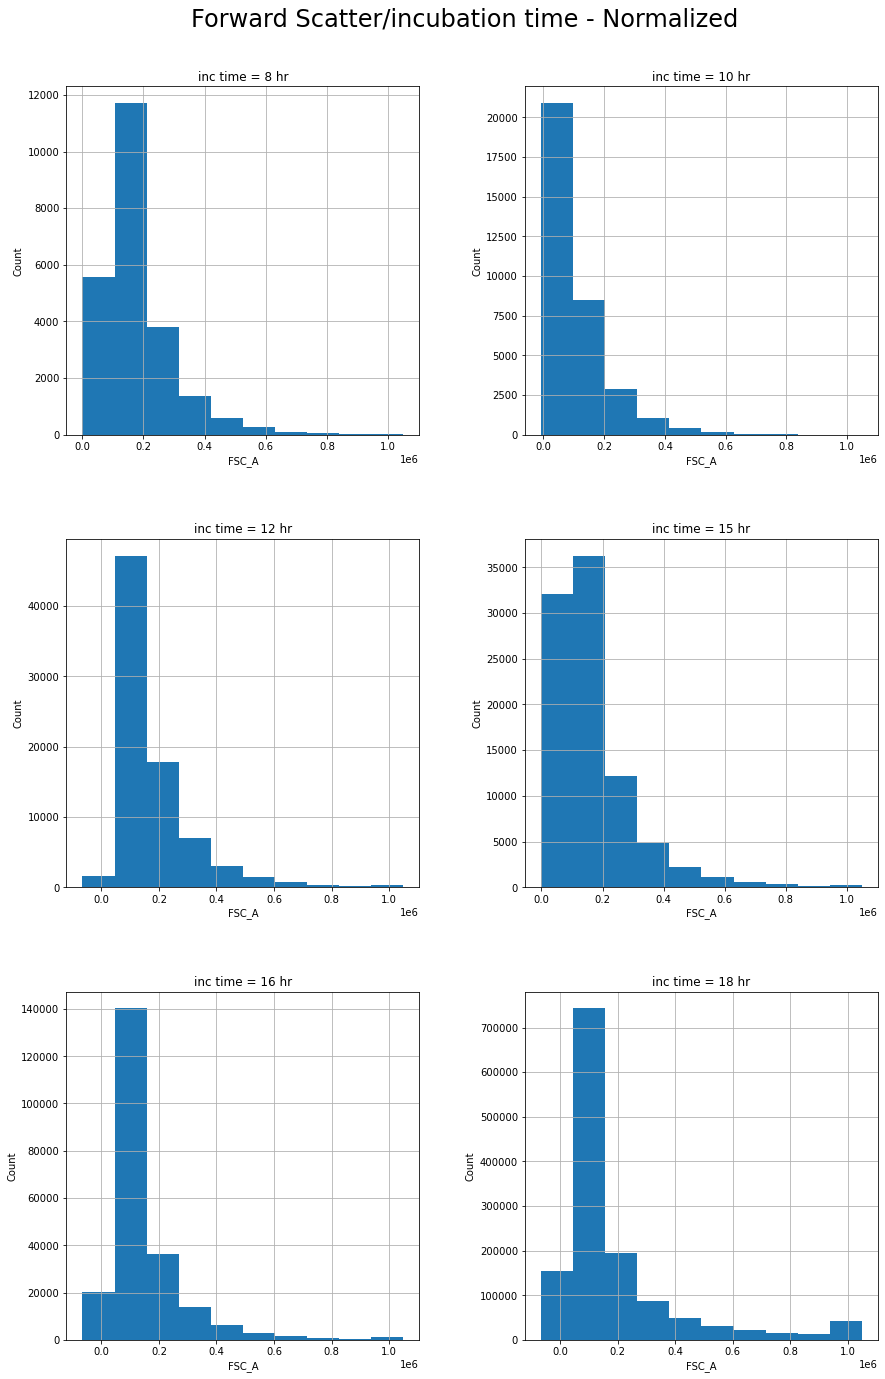

In [74]:
fig, axeses = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby('inc_time_2_hrs'):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
fig.suptitle('Forward Scatter/incubation time - Normalized', y=1.05, fontsize=24);

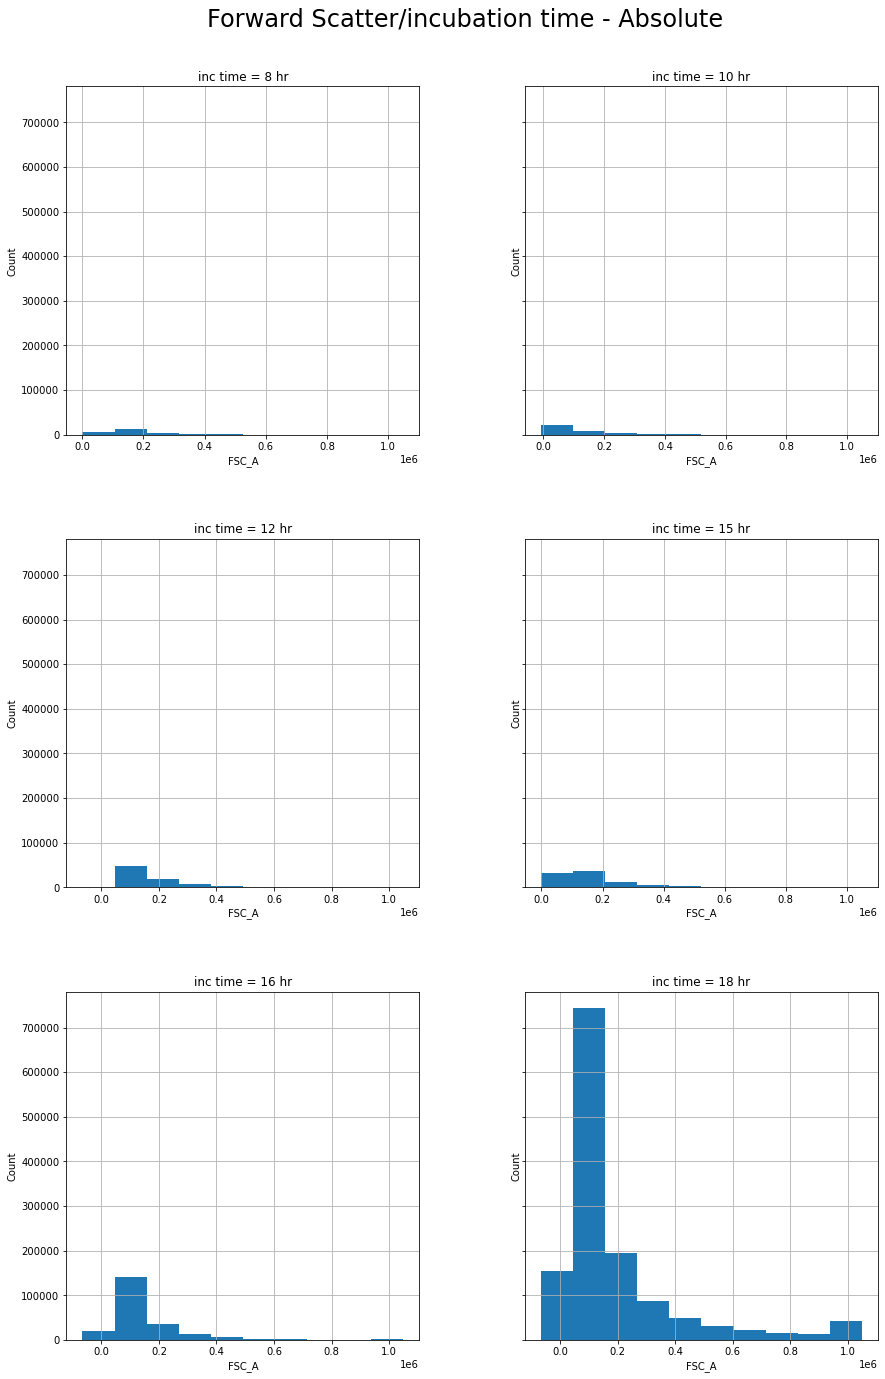

In [75]:
fig, axeses = plt.subplots(nrows=3, ncols=2, sharey=True)
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby('inc_time_2_hrs'):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
    
fig.suptitle('Forward Scatter/incubation time - Absolute', y=1.05, fontsize=24);

# Considering both incubation times

In [76]:
for group_name, df_group in df.groupby(['inc_time_1_hrs','inc_time_2_hrs']):
    print(group_name)


(16, 16)
(18, 8)
(18, 10)
(18, 12)
(18, 15)
(18, 16)
(18, 18)


## Plotting incubation times separately

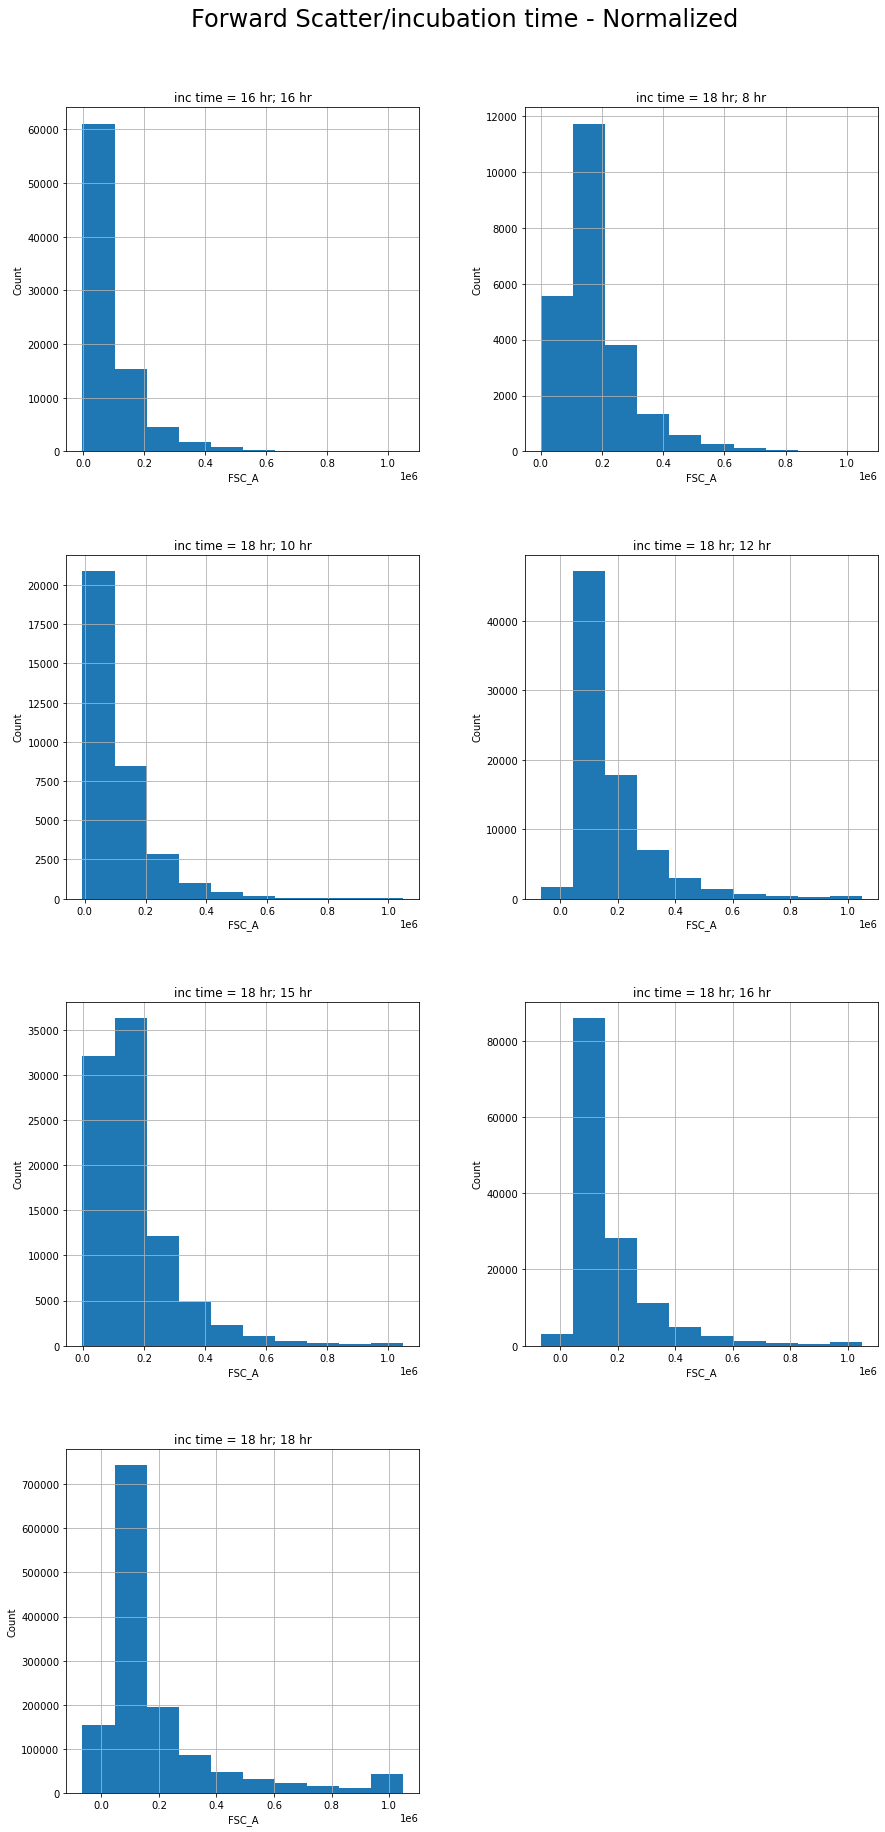

In [89]:
fig, axeses = plt.subplots(nrows=4, ncols=2)
fig.delaxes(axeses[3][1])
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby(['inc_time_1_hrs','inc_time_2_hrs']):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name[0]} hr; {group_name[1]} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
fig.suptitle('Forward Scatter/incubation time - Normalized', y=1.05, fontsize=24);

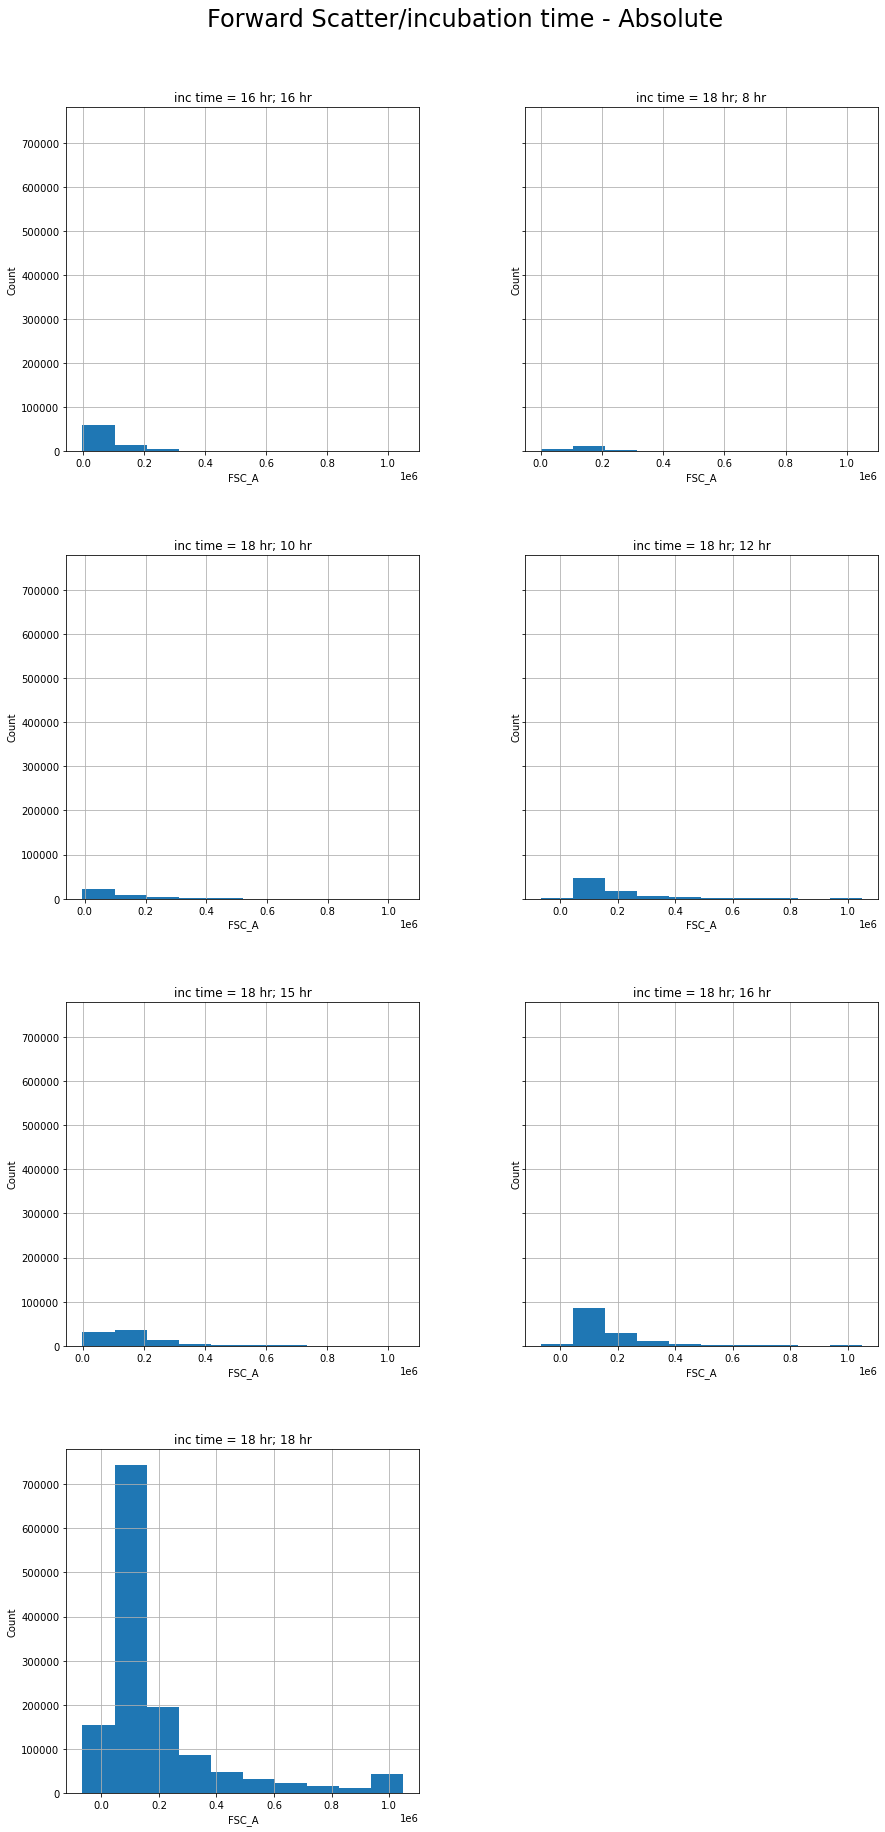

In [90]:
fig, axeses = plt.subplots(nrows=4, ncols=2, sharey=True)
fig.set_size_inches(axeses.shape[1] * 6, axeses.shape[0] * 6)
fig.delaxes(axeses[3][1])
fig.tight_layout()
axeses = axeses.flatten()
i = 0
for group_name, df_group in df.groupby(['inc_time_1_hrs','inc_time_2_hrs']):
    ax = axeses[i]
    df_group.hist(column='FSC_A', ax=axeses[i])
    ax.set_title(f'inc time = {group_name[0]} hr; {group_name[1]} hr')
    ax.set_xlabel('FSC_A')
    ax.set_ylabel('Count')
    i += 1
    
fig.suptitle('Forward Scatter/incubation time - Absolute', y=1.05, fontsize=24);

# Focus on 18 hour incubation time

This case has so much more data than any of the others that we should probably focus on it when making any gating decisions.

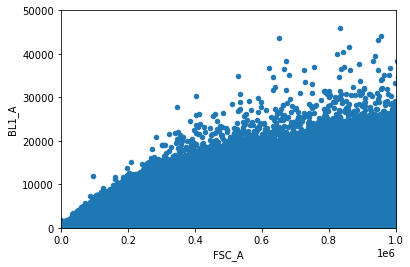

In [65]:
ax = df.query('inc_time_2_hrs == 18').plot.scatter(x='FSC_A', y='BL1_A')
ax.set_xlim(0, 1_000_000)
ax.set_ylim(0, 50_000);

In [180]:
df.query('inc_time_2_hrs == 18')[['FSC_A', 'SSC_A', 'BL1_A']].describe(percentiles=[0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

,FSC_A,SSC_A,BL1_A
count,1.350533e+06,1.350533e+06,1.350533e+06
mean,1.906975e+05,5.260371e+05,2.616004e+03
std,2.236408e+05,3.392590e+05,6.557300e+03
min,-6.553600e+04,-6.553600e+04,-9.859000e+03
25%,6.010900e+04,2.397030e+05,7.810000e+02
50%,1.062480e+05,4.002470e+05,1.355000e+03
75%,2.116580e+05,8.767900e+05,2.923000e+03
80%,2.593850e+05,1.048575e+06,3.592000e+03
85%,3.327196e+05,1.048575e+06,4.565000e+03
90%,4.617016e+05,1.048575e+06,6.123000e+03


## Single channel bound gating

Based on the above, we propose single channel gating as follows:

* $0 \leq$ **FSC_A** $< 900,000$
* $0 \leq$ **SSC_A** $< 900,000$
* $0 \leq$ **BL1_A** $< 20,000$

Values outside those ranges are likely to be mis-calibrated or otherwise outliers.

## Looking for sub-populations

Plotting Forward and Side-scatter to see if anything jumps out in terms of sub-populations.  Most of the population is very dispersed, but there's a definite chunk of the events that are small and that are correlated with having low fluorescence.

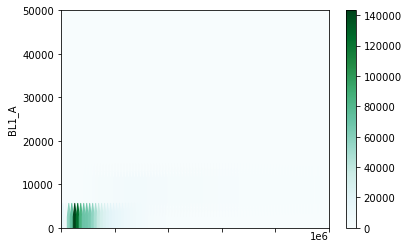

In [66]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='BL1_A')
ax.set_xlim(0, 1_000_000)
ax.set_ylim(0, 50_000);

In [172]:
df.query('inc_time_2_hrs == 18')[['FSC_A', 'SSC_A']].describe()

,FSC_A,SSC_A
count,1.350533e+06,1.350533e+06
mean,1.906975e+05,5.260371e+05
std,2.236408e+05,3.392590e+05
min,-6.553600e+04,-6.553600e+04
25%,6.010900e+04,2.397030e+05
50%,1.062480e+05,4.002470e+05
75%,2.116580e+05,8.767900e+05
max,1.048575e+06,1.048575e+06


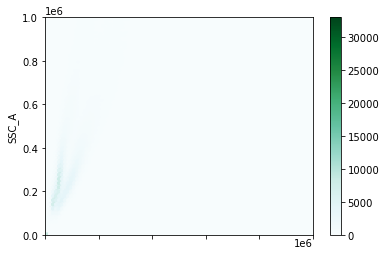

In [68]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A');
ax.set_xlim(0, 1_000_000); ax.set_ylim(0, 1_000_000);

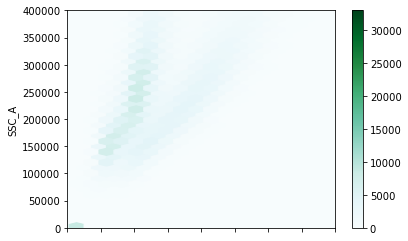

In [81]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A');
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);

Heatmap rescaled to make the two shapes clearer.

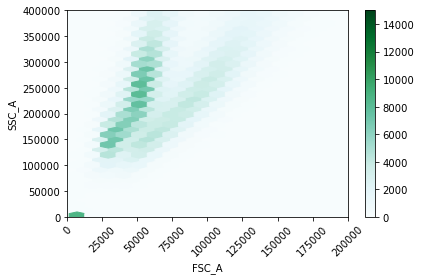

In [123]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A', vmax=15_000);
fig = ax.figure
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 200_001, 25_000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
fig.tight_layout()



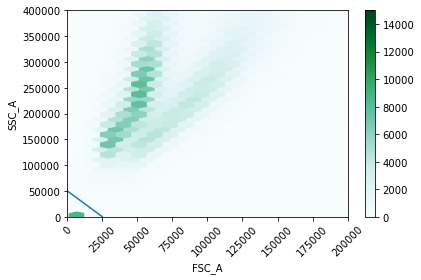

In [125]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A', vmax=15_000);
fig = ax.figure
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 200_001, 25_000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
ax.axline((25_000, 0), (0, 50_000))
ax.axline((25_000, 0), (0, 50_000))

fig.tight_layout()



In [148]:
data_points = df.query('inc_time_2_hrs == 18 and SSC_A < 400_000 and FSC_A < 150_000')[['FSC_A', 'SSC_A']].to_numpy()

In [149]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data_points)

In [150]:
scaled[0:10, :]

array([[ 1.6037685 ,  1.36545006],
       [-0.39691188, -1.07337616],
       [ 1.26875389, -0.03247774],
       [-0.9669445 , -0.91894068],
       [ 0.46477744, -0.1370055 ],
       [-0.57444488, -1.13693293],
       [ 0.20098437, -0.16238775],
       [ 1.17295638,  0.50196562],
       [-0.09724764,  0.34578087],
       [-0.36012929, -0.18878148]])

In [157]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [158]:
kmeans.fit(scaled)

KMeans(init='random', n_clusters=5, random_state=42)

In [159]:
kmeans.cluster_centers_

array([[-1.1729279 , -1.44799888],
       [-0.25494757,  0.96639759],
       [-0.48105155, -0.45617832],
       [ 1.69960142,  1.12288665],
       [ 0.80667501, -0.02692851]])

In [160]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ 31931.9738125 , 116405.5425651 ],
       [ 60133.2927853 , 319299.58684082],
       [ 53187.14130577, 199753.28038006],
       [120179.08799959, 332450.16027768],
       [ 92747.45196809, 235825.3305087 ]])

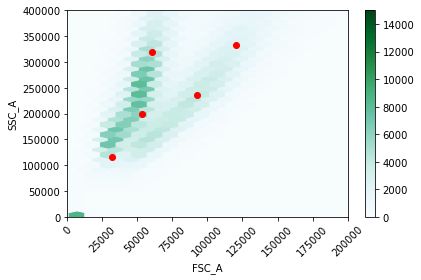

In [161]:
ax = df.query('inc_time_2_hrs == 18').plot.hexbin(x='FSC_A', y='SSC_A', vmax=15_000);
fig = ax.figure
ax.set_xlim(0, 200_000); ax.set_ylim(0, 400_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 200_001, 25_000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centroids[:, 0], centroids[:, 1], color='red')
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
fig.tight_layout()



## Zoom in to find bounds on debris cluster

There are 5482 events in the debris cluster area out of 1350533.


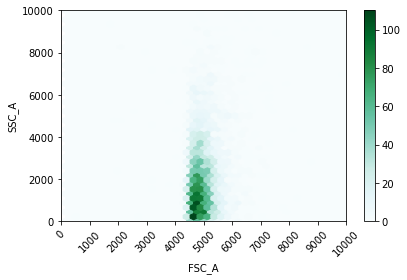

In [168]:
small_datapoints = df.query('inc_time_2_hrs == 18 and 0 <= SSC_A <= 25_000 and 0 <= FSC_A < 25_000')
print(f'There are {small_datapoints.shape[0]} events in the debris cluster area out of {df.query("inc_time_2_hrs == 18").shape[0]}.')
ax = small_datapoints.plot.hexbin(x='FSC_A', y='SSC_A');
fig = ax.figure
ax.set_xlim(0, 10_000); ax.set_ylim(0, 10_000);
xaxis = ax.get_xaxis()
xaxis.set_label_text('FSC_A', visible=True)
#ax.tick_params(axis='x',which='major')
xaxis.set_ticks(range(0, 10_001, 1000))
#print(ax.get_xticks())
#plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=True)
#print([str(int(x)) for x in ax.get_xticks()])
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, rotation=45, labeltop=False)
#lst = ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()], visible=True, rotation=45)
#print(ax.get_xticklabels())
#print(lst)
fig.tight_layout()



# Gating out the debris cluster
From the above, it looks like even an aggressive gate at 50,000 on the two scatter channels would safely get rid of the debris cluster without a lot of false positives, but we should examine the implications for this that we see in the negative controls, before applying them.

In [173]:
df.query('inc_time_2_hrs == 18 and FSC_A < 50_000 and SSC_A < 50_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,13066.000000,13066.000000,1.306600e+04
mean,5929.151232,1293.202051,7.551745e+01
std,4714.815798,9566.033685,9.173623e+03
min,-65536.000000,-65536.000000,-3.680000e+02
25%,4692.000000,-2477.750000,-3.700000e+01
50%,4922.000000,-238.000000,-1.000000e+01
75%,5261.000000,1956.000000,1.900000e+01
max,49938.000000,49991.000000,1.048575e+06


In [175]:
df.query('inc_time_2_hrs == 18 and FSC_A < 50_000 and SSC_A < 50_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe(percentiles=[.75, .8, .85, .90, .95])

,FSC_A,SSC_A,BL1_A
count,13066.000000,13066.000000,1.306600e+04
mean,5929.151232,1293.202051,7.551745e+01
std,4714.815798,9566.033685,9.173623e+03
min,-65536.000000,-65536.000000,-3.680000e+02
50%,4922.000000,-238.000000,-1.000000e+01
75%,5261.000000,1956.000000,1.900000e+01
80%,5382.000000,2588.000000,2.600000e+01
85%,5563.000000,3511.000000,3.500000e+01
90%,5954.000000,5293.500000,4.800000e+01
95%,12643.000000,19868.500000,7.000000e+01


The above suggests that a less aggressive gate at FSC_A < 15,000 and SSC_A < 20,000 would probably be appropriate.

In [176]:
df.query('inc_time_2_hrs == 18 and FSC_A < 15_000 and SSC_A < 20_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,12263.000000,12263.000000,1.226300e+04
mean,5144.415396,-693.951235,7.435440e+01
std,1430.763034,4309.026263,9.469131e+03
min,-65536.000000,-65536.000000,-2.960000e+02
25%,4692.000000,-2657.000000,-3.800000e+01
50%,4906.000000,-448.000000,-1.100000e+01
75%,5207.000000,1495.000000,1.700000e+01
max,14997.000000,19971.000000,1.048575e+06


In [177]:
df.query('inc_time_2_hrs == 18')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,1.350533e+06,1.350533e+06,1.350533e+06
mean,1.906975e+05,5.260371e+05,2.616004e+03
std,2.236408e+05,3.392590e+05,6.557300e+03
min,-6.553600e+04,-6.553600e+04,-9.859000e+03
25%,6.010900e+04,2.397030e+05,7.810000e+02
50%,1.062480e+05,4.002470e+05,1.355000e+03
75%,2.116580e+05,8.767900e+05,2.923000e+03
max,1.048575e+06,1.048575e+06,1.048575e+06


In [178]:
df.query('inc_time_2_hrs == 18and FSC_A >= 15_000 and SSC_A >= 20_000')[['FSC_A', 'SSC_A', 'BL1_A']].describe()

,FSC_A,SSC_A,BL1_A
count,1.335012e+06,1.335012e+06,1.335012e+06
mean,1.922637e+05,5.320204e+05,2.627382e+03
std,2.234912e+05,3.365662e+05,4.894594e+03
min,1.500400e+04,2.016600e+04,-5.272000e+03
25%,6.098100e+04,2.438220e+05,7.960000e+02
50%,1.073790e+05,4.062125e+05,1.374000e+03
75%,2.133622e+05,8.866805e+05,2.955000e+03
max,1.048575e+06,1.048575e+06,1.048575e+06


In [ ]:
a